# **Phase 3 - Inference**

**Team 03:**

- Bruno Fernandes, up202108871
- Hugo Abelheira, up202409899
- Luís Pereira, up200502498

## **Table of Contents**

* [Imports](#imports)
* [Load Data](#load-data)
* [Research Questions](#research-questions)
    * [RQ1: How does the average duration of wildfires differ across districts in multiple years?](#rq1)
        * [Boxplots](#rq1-boxplots)
        * [Violin Plots](#rq1-violin)
        * [ANOVA](#rq1-anova)
            * [Conditions](#rq1-conditions)
            * [Results](#rq1-results)
    * [RQ2: How does the average duration of wildfires in the districts vary throughout the years?](#rq2)
        * [ANOVA](#rq2-anova)
            * [Conditions](#rq2-conditions)
            * [Results](#rq2-results)
    * [RQ3: Has the average duration of wildfires decreased over the years?](#rq3)
        * [T-Test](#rq3-ttest)
            * [Conditions](#rq3-conditions)
            * [Results](#rq3-results)
            * [Confidence Interval](#rq3-confidence)
* [Formulate Conclusions](#conclusions)
    * [RQ1: How does the average duration of wildfires differ across districts in multiple years?](#c_rq1)
    * [RQ2: How does the average duration of wildfires in the districts vary throughout the years?](#c_rq2)
    * [RQ3: Has the average duration of wildfires decreased over the years?](#c_rq3)
* [Look Back and Ahead](#look_ba)

## **Imports** <a class="anchor" id="imports"></a>

In [1]:
# load the dataset
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

## **Load Data** <a class="anchor" id="load-data"></a>

We start by loading the data.

In [3]:
# load the dataset
dataset = pd.read_excel('datasets/clean_dataset.xlsx')

dataset

,Ano,AreaTotal_ha,Duracao_Horas,Distrito,Concelho,TypeArea
0,2011,0.0100,0.733333,Porto,Penafiel,Forest
1,2011,0.0050,0.783333,Porto,Vila Nova de Gaia,Forest
2,2011,0.0400,2.033333,Porto,Vila Nova de Gaia,Rural
3,2011,140.0000,8.083333,Viseu,São Pedro do Sul,Forest
4,2011,0.1000,2.333333,Viseu,Castro Daire,Forest
...,...,...,...,...,...,...
24621,2020,0.0050,0.633333,Porto,Paços de Ferreira,Forest
24622,2020,0.0100,1.283333,Viseu,Cinfães,Forest
24623,2020,0.0014,0.383333,Viseu,São João da Pesqueira,Forest
24624,2020,0.0050,0.716667,Viseu,Castro Daire,Forest


## **Research Questions** <a class="anchor" id="research-questions"></a>

We will now answer the research questions proposed in Phase 1.

### **RQ1: How does the average duration of wildfires differ across districts in multiple years?** <a class="anchor" id="rq1"></a>

This question aims to understand how the average duration of wildfires differs across the districts of Porto, Viseu and Faro in the years 2014, 2016 and 2018.

To answer this question, we started generating random samples of 60 wildfires for each district in each year.

We also created plots to visualize this data.

#### **Boxplots** <a class="anchor" id="rq1-boxplots"></a>

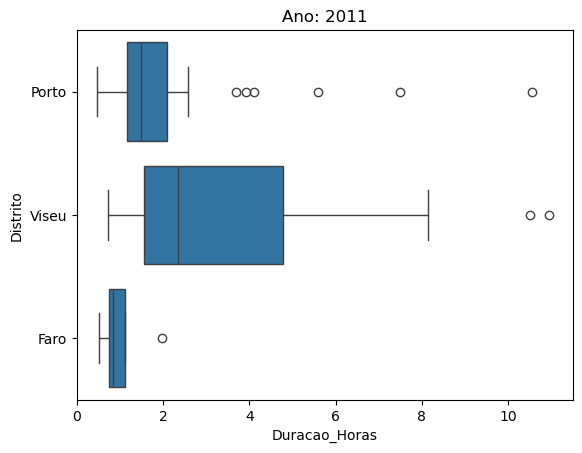

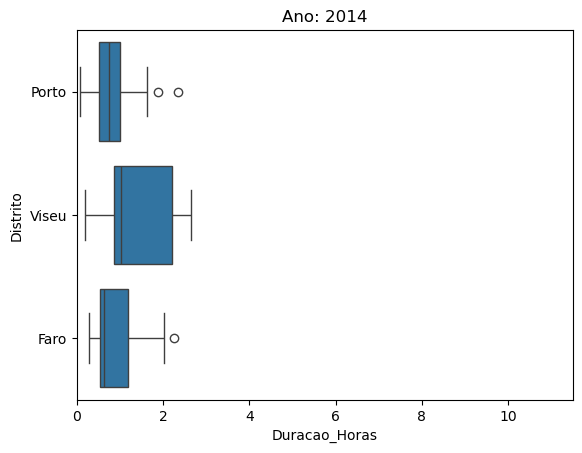

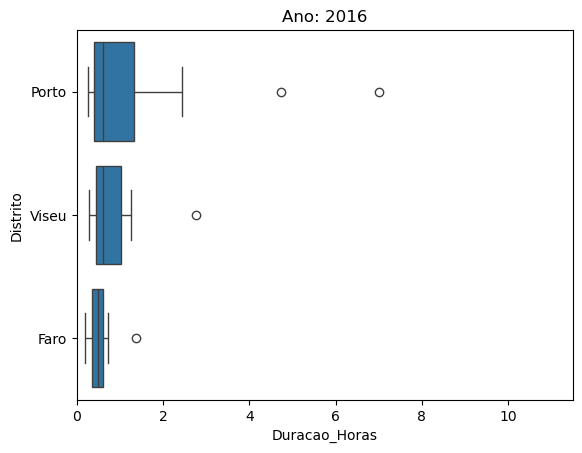

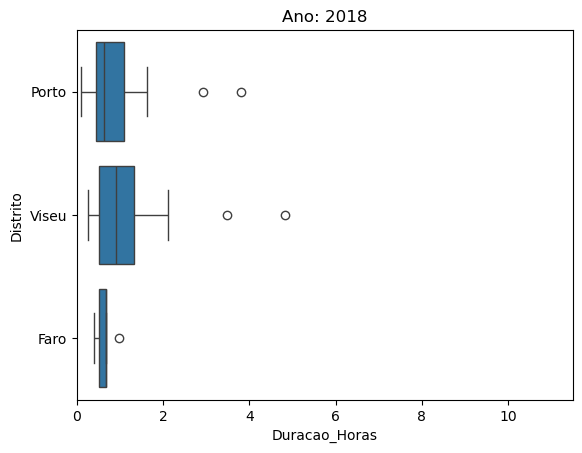

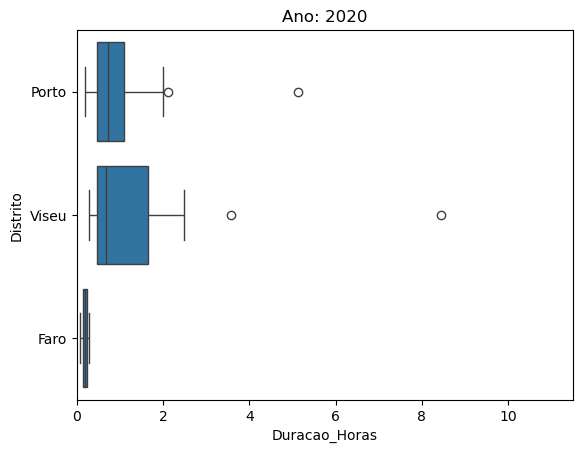

In [4]:
# make horizontal boxplots of the 'Duracao_Horas' column for each year
sample_size = 60

x_limit = dataset['Duracao_Horas'].max()
coefficient = 1.05

datasets_ano = []
x_limit = 0

for ano in dataset['Ano'].unique():
    datasets_ano.append(dataset[dataset['Ano'] == ano].sample(sample_size, random_state=999))
    x_limit = max(x_limit, datasets_ano[-1]['Duracao_Horas'].max())
    
for data in datasets_ano:
    sns.boxplot(y='Distrito', x='Duracao_Horas', data=data, order=['Porto', 'Viseu', 'Faro'])
    plt.xlim(0, x_limit * coefficient)
    plt.title(f'Ano: {data["Ano"].iloc[0]}')
    plt.show()

#### **Violin Plots** <a class="anchor" id="rq1-violin"></a>

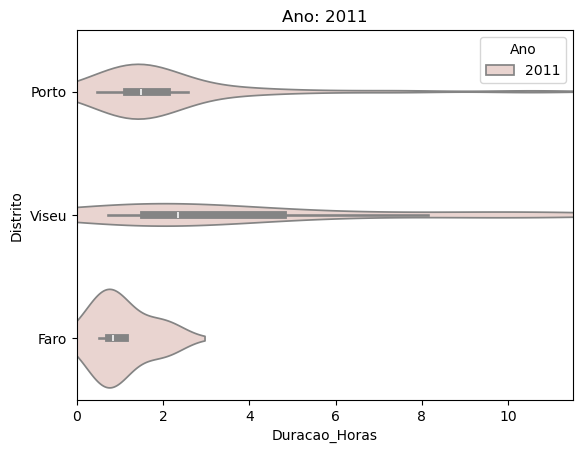

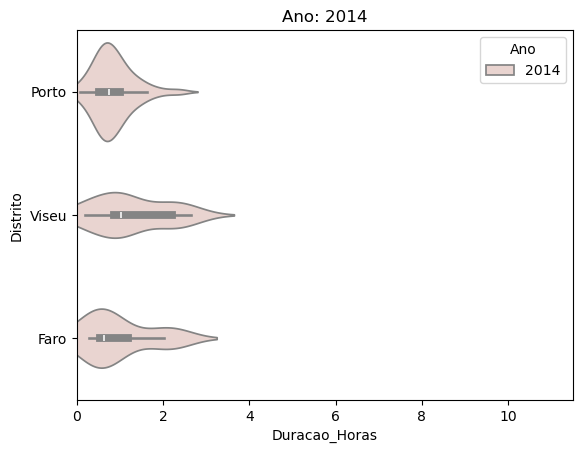

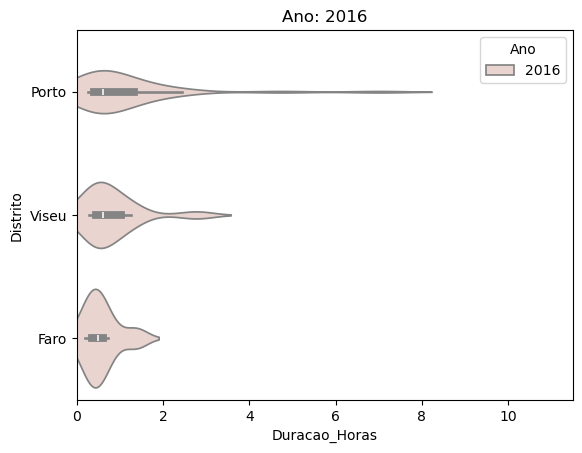

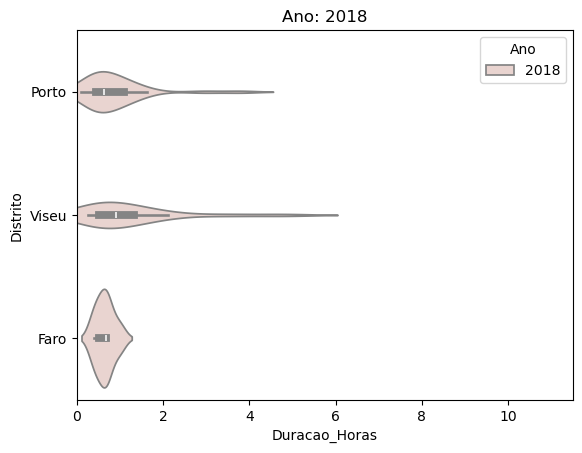

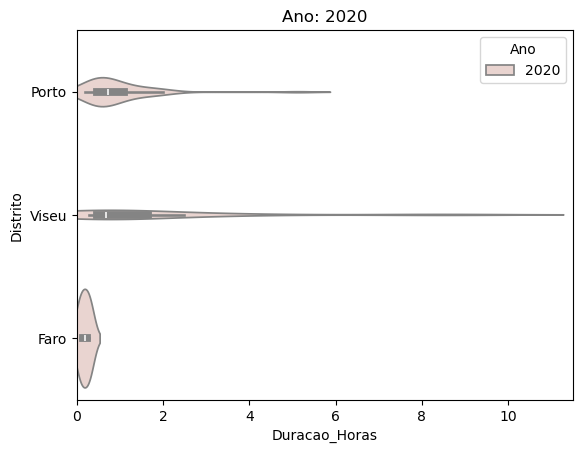

In [5]:
# make violin plots
for data in datasets_ano:
    sns.violinplot(y='Distrito', x='Duracao_Horas', data=data, hue='Ano', order=['Porto', 'Viseu', 'Faro'])
    plt.xlim(0, x_limit * coefficient)
    plt.title(f'Ano: {data["Ano"].iloc[0]}')
    plt.show()

We observe that throughout the years the average duration of the wildfires across all regions seems to go down.
Also, we observe that the average and the median values are very small. This means most of the fires are short, but it also means that all the fires that last a few hours are extreme outliers that have a huge impact on the mean.

In [6]:
# create a dictionary with the datasets for each year and district
years = [2014, 2016, 2018]
districts = ['Porto', 'Viseu', 'Faro']

datasets_years = {}

for year in years:
    d = []
    for district in districts:
        d.append(dataset[(dataset['Ano'] == year) & (dataset['Distrito'] == district)].sample(sample_size, random_state=999))
    
    datasets_years[year] = d

#### **ANOVA** <a class="anchor" id="rq1-anova"></a>

We will perform an ANOVA test to check if the average duration of the wildfires is the same across all districts in each year.

We start by checking the conditions for the ANOVA test: normality, independence and constant variance.

##### **Conditions** <a class="anchor" id="rq1-conditions"></a>

**Independence**

Since the data is from random samples, this condition is satisfied. We can move on to the normality condition.

**Normality**

Given that the sample size is large (> 50) and less than 10% the population, we can assume that the data is normally distributed.

**Constant Variance**

To check the constant variance, we will perform **Levene tests**.

The Levene test tests the null hypothesis that all input samples are from populations with equal variances.

The null hypothesis is that the data has equal variance. The alternative hypothesis is that the data does not have equal variance.

In [7]:
# perform the Levene test for homogeneity of variances
from scipy.stats import levene

alpha = 0.05

for year, data in datasets_years.items():
    statistic, p_value = levene(data[0]['Duracao_Horas'], data[1]['Duracao_Horas'], data[2]['Duracao_Horas'])
    
    print(f'Year: {year}')
    print(f'Statistic: {statistic}, P-Value: {p_value}')
    
    if p_value < alpha:
        print('The variances are not homogeneous')
    else:
        print('The variances are homogeneous')
    
    print()

Year: 2014
Statistic: 1.4191208653330942, P-Value: 0.24466555934769835
The variances are homogeneous

Year: 2016
Statistic: 1.6299680928005178, P-Value: 0.19886287961833546
The variances are homogeneous

Year: 2018
Statistic: 2.3838618575015778, P-Value: 0.09514808575020013
The variances are homogeneous



So, we conclude that the data has equal variance.

##### **Results** <a class="anchor" id="rq1-results"></a>

For: 

H0 (Null Hypothesis): The mean durations ('Duracao_Horas') of the three groups are equal.

HA (Alternative Hypothesis): At least one group has a different mean duration.

In [8]:
# perform anova test on the 'Duracao_Horas' column
from scipy.stats import f_oneway

for year, data in datasets_years.items():
    statistic, p_value = f_oneway(data[0]['Duracao_Horas'], data[1]['Duracao_Horas'], data[2]['Duracao_Horas'])
    
    print(f'Year: {year}')
    print(f'Statistic: {statistic}, P-Value: {p_value}')
    
    if p_value < alpha:
        print('There is a significant difference between the means')
    else:
        print('There is no significant difference between the means')
    
    print()

Year: 2014
Statistic: 1.7556269790771264, P-Value: 0.17579439153146623
There is no significant difference between the means

Year: 2016
Statistic: 3.3138779014169155, P-Value: 0.03864489876149626
There is a significant difference between the means

Year: 2018
Statistic: 6.370939960074495, P-Value: 0.002129074936598862
There is a significant difference between the means



After conducting the ANOVA tests with a significance level of 5%, we observe that the null hypothesis is rejected in the years 2016 and 2018, which means that the average duration of the wildfires is not the same across all regions in those years. 

In 2014, we failed to reject the null hypothesis, which means that we cannot say that the average duration of the wildfires is different across all regions in that year.

The fact that no difference in the average wildfire duration was observed in 2014 may suggest that external factors, such as temperature variations or environmental changes, could have influenced the consistency in wildfire duration across regions that year.

### **RQ2: How does the average duration of wildfires in the districts vary throughout the years?** <a class="anchor" id="rq2"></a>

This question aims to understand how the average duration of wildfires varies throughout the years 2014, 2016 and 2018 in the districts of Porto, Viseu, and Faro.

#### **ANOVA** <a class="anchor" id="rq2-anova"></a>

We will perform more ANOVA tests. This time, we will check if the average duration of the wildfires is the same for different years in the same district.

We start by checking the conditions for the ANOVA tests: normality, independence and constant variance.

##### **Conditions** <a class="anchor" id="rq2-conditions"></a>

**Independence**

Since the data is from random samples, this condition is satisfied. We can move on to the normality condition.

**Normality**

Given that the sample size is large (> 50) and less than 10% the population, we can assume that the data is normally distributed.

**Constant Variance**

To check the constant variance, we will perform more **Levene tests**.

In [9]:
# now check if the variances between the same region in different years are homogeneous
for i in range(3):
    statistic, p_value = levene(datasets_years[years[0]][i]['Duracao_Horas'], datasets_years[years[1]][i]['Duracao_Horas'], datasets_years[years[2]][i]['Duracao_Horas'])
    
    print(f'District: {districts[i]}')
    print(f'Statistic: {statistic}, P-Value: {p_value}')
    
    if p_value < alpha:
        print('The variances are not homogeneous')
    else:
        print('The variances are homogeneous')
    
    print()

District: Porto
Statistic: 1.8428043419559945, P-Value: 0.16139821967948723
The variances are homogeneous

District: Viseu
Statistic: 0.36840638252689384, P-Value: 0.6923652076767848
The variances are homogeneous

District: Faro
Statistic: 0.15190267499612753, P-Value: 0.8591837571671432
The variances are homogeneous



So, we conclude that the data has equal variance.

##### **Results** <a class="anchor" id="rq2-results"></a>

For:

H0 (Null Hypothesis): The mean durations ('Duracao_Horas') across the years for each district are equal.

HA (Alternative Hypothesis): At least one year has a different mean duration for the district.

In [10]:
# perform anova test on the 'Duracao_Horas' column for each district
for i in range(3):
    statistic, p_value = f_oneway(datasets_years[years[0]][i]['Duracao_Horas'], datasets_years[years[1]][i]['Duracao_Horas'], datasets_years[years[2]][i]['Duracao_Horas'])
    
    print(f'District: {districts[i]}')
    print(f'Statistic: {statistic}, P-Value: {p_value}')
    
    if p_value < alpha:
        print('There is a significant difference between the means')
    else:
        print('There is no significant difference between the means')
    
    print()

District: Porto
Statistic: 2.5794000611927586, P-Value: 0.07866747036572722
There is no significant difference between the means

District: Viseu
Statistic: 1.3677419457538391, P-Value: 0.25735969922800933
There is no significant difference between the means

District: Faro
Statistic: 0.11975356726443727, P-Value: 0.887210845904354
There is no significant difference between the means



As we can see, we fail to reject the null hypothesis for all districts, which means that we cannot conclude that the average duration of the wildfires is different in the districts throughout the years.

Therefore, we cannot attribute any variation in wildfire duration to district-specific factors, suggesting that other variables—such as yearly climatic conditions or broader regional policies—might play a more dominant role in influencing wildfire duration across all districts.

### **RQ3: Has the duration of wildfires decreased after 2017?** <a class="anchor" id="rq3"></a>

To answer this question, we will perform a t-test to check if the average duration of wildfires is different before and after 2017.

For this test, we consider the years 2014, 2016, 2018 and 2020. The districts considered are Porto, Viseu, and Faro.

#### **T-Test** <a class="anchor" id="rq3-ttest"></a>

We will perform a t-test to check if the average duration of the wildfires is different before and after 2017.

First, we will check the conditions for the t-test: normality and independence.

##### **Conditions** <a class="anchor" id="rq3-conditions"></a>

**Independence**

Since the data is from random samples, this condition is satisfied. We can move on to the normality condition.

**Normality**

Given that the sample size is large (> 50) and less than 10% the population, we can assume that the data is normally distributed.

##### **Results** <a class="anchor" id="rq3-results"></a>

For: 

H0 (Null Hypothesis): The mean wildfire duration before 2017 is equal to the mean duration after 2017.

HA (Alternative Hypothesis): The mean wildfire duration before 2017 is different from the mean duration after 2017 (for a two-sided test).

##### **T-Test**

In [11]:
before_2017 = dataset[(dataset['Ano'] == 2014) | (dataset['Ano'] == 2016)]['Duracao_Horas']
after_2017 = dataset[(dataset['Ano'] == 2018) | (dataset['Ano'] == 2020)]['Duracao_Horas']

In [12]:
from math import sqrt
from scipy.stats import t

def hypothesis_test_two_means(mean1, mean2, sd1, sd2, n1, n2, two_sided = True):
    """
    Performs a hypothesis test for the difference between two means.
    Args:
        alpha (float): Significance level.
        mean1 (float): Sample mean for group 1.
        mean2 (float): Sample mean for group 2.
        sd1 (float): Sample standard deviation for group 1.
        sd2 (float): Sample standard deviation for group 2.
        n1 (int): Sample size for group 1.
        n2 (int): Sample size for group 2.
        two_sided (bool, optional): Whether to perform a two-sided test. Defaults to True.
    Returns:
        float: The calculated p-value.
    """
    
    standard_error = sqrt((sd1**2/n1) + (sd2**2/n2))
    statistic = (mean1 - mean2) / standard_error
        
    st = abs(statistic)
    
    n = min(n1, n2)
    p_value = (2 * (1 - t.cdf(st, n - 1))) if (two_sided) else (1 - t.cdf(st, n - 1))
        
    return statistic, p_value

In [13]:
before_2017_mean = before_2017.mean()
print(f"The mean wildfire duration BEFORE 2017 {before_2017_mean}")
after_2017_mean = after_2017.mean()
print(f"The mean wildfire duration AFTER 2017 {after_2017_mean}")

before_2017_sd = before_2017.std()
after_2017_sd = after_2017.std()

n1 = len(before_2017)
n2 = len(after_2017)

statistic, p_value = hypothesis_test_two_means(before_2017_mean, after_2017_mean, before_2017_sd, after_2017_sd, n1, n2, two_sided = True)

print(f'statistic: {statistic}')
print(f'p-value: {p_value}')
    
if p_value < alpha:
    print('\nReject null hypothesis')
else:
    print('\nFail to reject null hypothesis')

The mean wildfire duration BEFORE 2017 1.3219112363220642
The mean wildfire duration AFTER 2017 1.18699012451696
statistic: 2.4099609217084277
p-value: 0.015979911059294416

Reject null hypothesis


Since the p-value from the t-test is lower than the significance level, we reject the null hypothesis, indicating a significant difference in the average wildfire duration before and after 2017. 

By comparing the means, we can then assess the direction of this difference.

Since the mean wildfire duration after 2017 is lower than the mean before 2017, we can conclude that the average duration has decreased over the years.

Lets run a confidence interval test to confirm the direction of this difference.

##### **Confidence Interval** <a class="anchor" id="rq3-confidence"></a>

We can also calculate the confidence interval for the difference in the average duration of the wildfires before and after 2017.

In [14]:
# compute the confidence interval for the difference between the means
def confidence_interval_two_means(mean1, mean2, sd1, sd2, n1, n2, alpha):
    """
    Computes the confidence interval for the difference between two means.
    Args:
        mean1 (float): Sample mean for group 1.
        mean2 (float): Sample mean for group 2.
        sd1 (float): Sample standard deviation for group 1.
        sd2 (float): Sample standard deviation for group 2.
        n1 (int): Sample size for group 1.
        n2 (int): Sample size for group 2.
        alpha (float): Significance level.
    Returns:
        tuple: The lower and upper bounds of the confidence interval.
    """
    
    standard_error = sqrt((sd1**2/n1) + (sd2**2/n2))
    margin_error = t.ppf(1 - alpha/2, min(n1, n2) - 1) * standard_error
    
    lower_bound = (mean1 - mean2) - margin_error
    upper_bound = (mean1 - mean2) + margin_error
    
    return lower_bound, upper_bound

In [15]:
# compute the confidence interval for the difference between the means
lower_bound, upper_bound = confidence_interval_two_means(before_2017_mean, after_2017_mean, before_2017_sd, after_2017_sd, n1, n2, alpha)

print(f'Confidence Interval: [{round(lower_bound, 4)}, {round(upper_bound, 4)}]')

Confidence Interval: [0.0252, 0.2447]


This confidence interval indicates, with 95% confidence, that the difference in average wildfire duration between the periods before and after 2017 is between 0.025 and 0.245 hours. Since both values in the interval are positive, we can conclude that the average duration of wildfires was significantly higher before 2017 compared to after 2017, representing a decrease in wildfire duration after 2017.

## **Formulate Conclusions** <a class="anchor" id="conclusions"></a>

### **RQ1: How does the average duration of wildfires differ across districts in multiple years?** <a class="anchor" id="c_rq1"></a>

 1) ANOVA tests at a 5% significance level show significant regional differences in wildfire duration for 2016 and 2018, but not for 2014. 
 
 2) The consistency in 2014 may indicate external factors, like stable temperatures, affecting wildfire duration across regions.

### **RQ2: How does the average duration of wildfires in the districts vary throughout the years?** <a class="anchor" id="c_rq2"></a>

 1) The null hypothesis is not rejected for any district, indicating no significant difference in average wildfire duration across districts over the years.

 2) This may suggest that district-specific factors do not explain variations in wildfire duration.
 
 3) Other variables, such as annual climate conditions or regional policies, may have a stronger influence on wildfire duration across districts.

### **RQ3: Has the duration of wildfires decreased after 2017?** <a class="anchor" id="c_rq3"></a>

* Hypothesis Test
    1) The p-value from the t-test is below the significance level, leading us to reject the null hypothesis, indicating a significant change in average wildfire duration before and after 2017.

    2) A comparison of means shows that the average wildfire duration has decreased after 2017. To confirm this trend, a confidence interval test was conducted to verify the direction of the difference.

* Confidence Interval
    1) The 95% confidence interval shows that the difference in average wildfire duration before and after 2017 ranges from 0.025 to 0.245 hours.

    2) Since both interval values are positive, this confirms that wildfire duration was significantly higher before 2017.
    
    3) We conclude that there has been a measurable decrease in wildfire duration after 2017.

## **Look Back and Ahead** <a class="anchor" id="look_ba"></a>

### Limitations:

* Variables used: given that, not all variables available were used in this investigation, all potential factors that can influence the frequency of wildfires were not taken into account.

* Project scale: the scale of the project was small, which lead to constraints in terms of time and resources.


### Future research possibilities:

* Increase project scale: conduct a larger-scale study with more time and resources to enable a deeper exploration of the relationships between variables.

* Expanding variable scope: investigate the impact of variables that were not included in this project.